In [125]:
%matplotlib inline

from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

In [126]:
X = pd.read_csv("Final.csv")
X.head()

,Unnamed: 0,Company,0214price,0214amt,0514price,0514amt,0814price,0814amt,1114price,1114amt,0214-0514chng,0514-0814chng,0814-1114chng
0,0,1 800 FLOWERS COM,5.409870,48430,5.637158,37785,5.807883,30648,7.210945,20247,-10645,-7137,-10401
1,1,1ST SOURCE CORP,31.928269,60448,32.084393,50336,30.621486,47483,28.484152,38302,-10112,-2853,-9181
2,2,3-D SYS CORP DEL,92.933651,158059,59.149994,1404531,59.799876,2179252,46.370233,1777800,1246472,774721,-401452
3,3,3M CO,140.249912,1904593,135.660022,2373330,143.239747,2803342,141.680126,2126198,468737,430012,-677144
4,4,58 COM INC,38.362069,16240,41.630911,45447,54.059749,1679956,37.249791,2582538,29207,1634509,902582


Fit a model that predicts the stock price of next quarter using the change of investment during that quarter by running least square regressions. 

In [127]:
# sp is the s&p500 price
sp0214 = 1838.630005
sp0514 = 1888.530029
sp0814 = 1955.180054
sp1114 = 2039.819946

In [128]:
###### first quarter investment vs first quarter stock price change
#col1: 20140214-20140514 investment
#col2: 20140214-20140514 stock price change

X1 = X[(X['0214-0514chng'] >= 2000000) | (X['0214-0514chng'] < -2000000)]

In [129]:
X1

,Unnamed: 0,Company,0214price,0214amt,0514price,0514amt,0814price,0814amt,1114price,1114amt,0214-0514chng,0514-0814chng,0814-1114chng
10,10,ABBOTT LABS,38.329961,14397197,38.509987,16706160,40.899968,16036883,41.590024,15458034,2308963,-669277,-578849
22,22,ACCESS MIDSTREAM PARTNERS L,56.580045,6020992,57.550021,8784949,63.549996,10031944,63.639927,9804521,2763957,1246995,-227423
56,56,AETNA INC NEW,68.590058,4920961,74.969988,2882140,81.080535,1434956,81.000211,1708119,-2038821,-1447184,273163
123,123,ALPS ETF TR,18.124145,6384522,17.893765,9554669,19.135368,9490489,19.169892,6861541,3170147,-64180,-2628948
124,124,ALTERA CORP,32.510991,19353086,36.234923,17127896,34.759998,8299684,35.779992,8725575,-2225190,-8828212,425891
128,128,ALTRIA GROUP INC,38.390013,8433287,37.429807,6359103,41.939945,7685394,45.939961,6095717,-2074184,1326291,-1589677
156,156,AMERICAN INTL GROUP INC,51.018122,14217693,49.983702,16572942,54.536698,14735179,53.984594,12545857,2355249,-1837763,-2189322
161,161,AMERICAN RLTY CAP PPTYS INC,12.852154,459067,14.020040,2796283,12.529788,2913936,12.059964,3807557,2337216,117653,893621
211,211,APOLLO INVT CORP,8.474798,535470,8.310291,2831790,8.610224,3183773,8.169941,2952653,2296320,351983,-231120
215,215,APPLIED MATLS INC,17.679997,17422062,20.414983,11309096,22.549927,10342384,21.609969,8087795,-6112966,-966712,-2254589


In [130]:
y1 = np.abs((X1['0514price'] - X1['0214price'])/X1['0214price'] - (sp0514 - sp0214)/sp0214)
y1 = (y1- np.mean(y1))/np.std(y1)
x1 = X1['0214-0514chng']
x1 = (x1- np.mean(x1))/np.std(x1)
length = np.size(x1)
#x1 = x1.reshape(length, 1)
#y1 = y1.reshape(length, 1)

In [131]:
#col1: 20140214-20140514 investment
#col2: 20140214-20140514 stock price change
d = {'col1': x1, 'col2': y1}
data = pd.DataFrame(data=d)
data

,col1,col2
10,0.148731,-0.588205
22,0.219180,-0.686969
56,-0.524460,-0.243571
123,0.282072,-0.450074
124,-0.553316,-0.072744
128,-0.529935,-0.352469
156,0.155897,-0.390052
161,0.153105,-0.260588
211,0.146773,-0.396910
215,-1.155282,0.245843


In [132]:
mod = smf.quantreg('col2 ~ col1',data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                   col2   Pseudo R-squared:              0.01245
Model:                       QuantReg   Bandwidth:                      0.5234
Method:                 Least Squares   Sparsity:                        1.263
Date:                Mon, 04 Dec 2017   No. Observations:                  110
Time:                        15:03:32   Df Residuals:                      108
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2872      0.060     -4.771      0.000      -0.406      -0.168
col1          -0.0640      0.060     -1.064      0.290      -0.183       0.055


In [133]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['col1']] + \
            res.conf_int().ix['col1'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('col2 ~ col1', data).fit()
ols_ci = ols.conf_int().ix['col1'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['col1'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


      q         a         b        lb        ub
0  0.05 -0.720101 -0.016925 -0.062787  0.028937
1  0.15 -0.641480 -0.004050 -0.065679  0.057579
2  0.25 -0.532927 -0.022432 -0.135060  0.090196
3  0.35 -0.454398 -0.035729 -0.123012  0.051553
4  0.45 -0.353981 -0.052734 -0.158966  0.053499
5  0.55 -0.247426 -0.070777 -0.201439  0.059885
6  0.65 -0.007551 -0.111395 -0.272448  0.049659
7  0.75  0.134615 -0.135470 -0.374042  0.103102
8  0.85  0.471741 -0.192557 -0.577660  0.192546
9  0.95  2.121147  1.035371  0.668318  1.402425


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # Remove the CWD from sys.path while we load stuff.


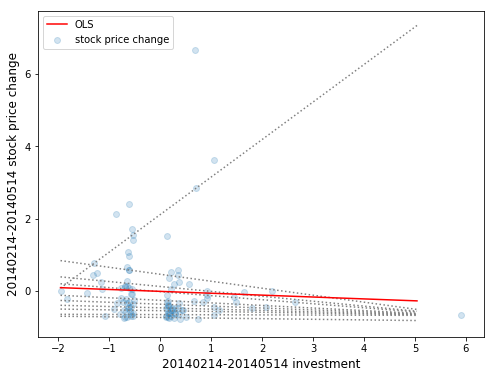

In [134]:
#col1: 20140214-20140514 investment
#col2: 20140214-20140514 stock price change

x = np.arange(data.col1.min(), data.col1.max())
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.col1, data.col2, alpha=.2,label='stock price change')
legend = ax.legend()
ax.set_xlabel('20140214-20140514 investment', fontsize=12)
ax.set_ylabel('20140214-20140514 stock price change', fontsize=12);

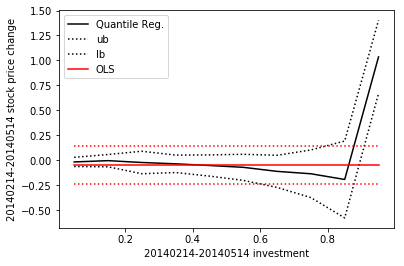

In [135]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'20140214-20140514 stock price change')
plt.xlabel('20140214-20140514 investment')
plt.legend()
plt.show()

                         QuantReg Regression Results                          
Dep. Variable:                   col2   Pseudo R-squared:             0.006866
Model:                       QuantReg   Bandwidth:                      0.3890
Method:                 Least Squares   Sparsity:                       0.8582
Date:                Mon, 04 Dec 2017   No. Observations:                  105
Time:                        15:03:34   Df Residuals:                      103
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3590      0.042     -8.573      0.000      -0.442      -0.276
col1          -0.0369      0.042     -0.880      0.381      -0.120       0.046
      q         a         b        lb        ub
0  0.05 -0.631633  0.002426 -0.147899  0.152751
1  0.15 -0.570601 -0.006372 -0.0683

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


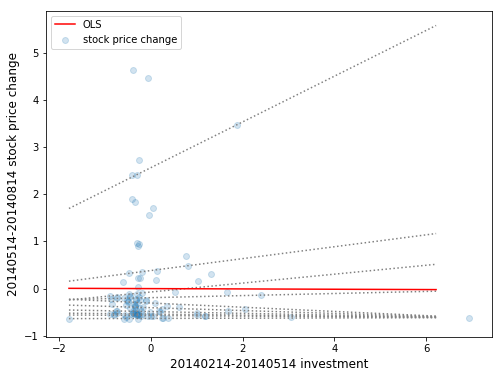

In [136]:
#first quarter investment vs second quarter stock price change
#col1: 20140214-20140514 investment
#col2: 20140514-20140814 stock price change

X1 = X[(X['0514-0814chng'] >= 2000000) | (X['0514-0814chng'] < -2000000)]

y1 = np.abs((X1['0814price'] - X1['0514price'])/X1['0514price'] - (sp0814 - sp0514)/sp0514)
y1 = (y1- np.mean(y1))/np.std(y1)
x1 = X1['0214-0514chng']
x1 = (x1- np.mean(x1))/np.std(x1)


d = {'col1': x1, 'col2': y1}
data = pd.DataFrame(data=d)


mod = smf.quantreg('col2 ~ col1',data)
res = mod.fit(q=.5)
print(res.summary())

quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['col1']] + \
            res.conf_int().ix['col1'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('col2 ~ col1', data).fit()
ols_ci = ols.conf_int().ix['col1'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['col1'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)


x = np.arange(data.col1.min(), data.col1.max())
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.col1, data.col2, alpha=.2,label='stock price change')
legend = ax.legend()
ax.set_xlabel('20140214-20140514 investment', fontsize=12)
ax.set_ylabel('20140514-20140814 stock price change', fontsize=12);

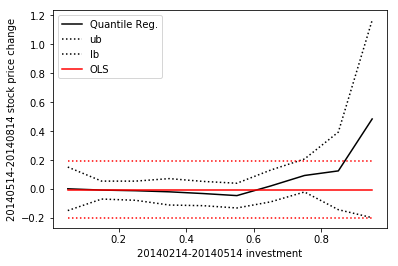

In [137]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'20140514-20140814 stock price change')
plt.xlabel('20140214-20140514 investment')
plt.legend()
plt.show()

                         QuantReg Regression Results                          
Dep. Variable:                   col2   Pseudo R-squared:            8.964e-06
Model:                       QuantReg   Bandwidth:                      0.5008
Method:                 Least Squares   Sparsity:                        1.383
Date:                Mon, 04 Dec 2017   No. Observations:                  113
Time:                        15:03:35   Df Residuals:                      111
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2435      0.065     -3.744      0.000      -0.372      -0.115
col1          -0.0008      0.065     -0.012      0.990      -0.130       0.128


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


      q         a         b        lb        ub
0  0.05 -0.843077 -0.030878 -0.108355  0.046598
1  0.15 -0.744724 -0.026671 -0.138188  0.084846
2  0.25 -0.603408 -0.064847 -0.180145  0.050451
3  0.35 -0.419968  0.024815 -0.087594  0.137224
4  0.45 -0.313789  0.009410 -0.112141  0.130962
5  0.55 -0.204380 -0.006488 -0.143097  0.130120
6  0.65 -0.105267 -0.020891 -0.173860  0.132078
7  0.75  0.053599 -0.043977 -0.257776  0.169822
8  0.85  0.547533 -0.086935 -0.369494  0.195625
9  0.95  2.670327 -0.424228 -2.967944  2.119488


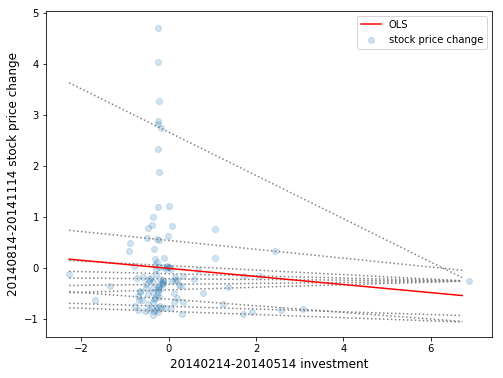

In [138]:
#first quarter investment vs third quarter stock price change
#col1: 20140214-20140514 investment
#col2: 20140814-20141114 stock price change

X1 = X[(X['0814-1114chng'] >= 2000000) | (X['0814-1114chng'] < -2000000)]

y1 = np.abs((X1['1114price'] - X1['0814price'])/X1['0814price'] - (sp1114 - sp0814)/sp0814)
y1 = (y1- np.mean(y1))/np.std(y1)
x1 = X1['0214-0514chng']
x1 = (x1- np.mean(x1))/np.std(x1)

#col1: 20140214-20140514 investment
#col2: 20140814-20141114 stock price change
d = {'col1': x1, 'col2': y1}
data = pd.DataFrame(data=d)


mod = smf.quantreg('col2 ~ col1',data)
res = mod.fit(q=.5)
print(res.summary())

quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['col1']] + \
            res.conf_int().ix['col1'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('col2 ~ col1', data).fit()
ols_ci = ols.conf_int().ix['col1'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['col1'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)

x = np.arange(data.col1.min(), data.col1.max())
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.col1, data.col2, alpha=.2,label='stock price change')
legend = ax.legend()
ax.set_xlabel('20140214-20140514 investment', fontsize=12)
ax.set_ylabel('20140814-20141114 stock price change', fontsize=12);


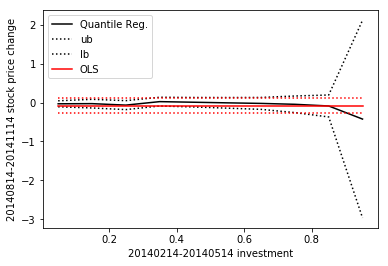

In [139]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'20140814-20141114 stock price change')
plt.xlabel('20140214-20140514 investment')
plt.legend()
plt.show()